#### CMSE 202 Final Project
### &#9989; Griffin Frendo, Ian Byram, Ty Buckley, Yoel Garcia 
### &#9989; Section_002
#### &#9989; 4/26/21

# Background/Motivation

The legalization and decriminalization of  drugs is a very tense and debated topic in today's society. Such a law passed will have major impacts for society, some very good, some bad. Through this project we want to explore some impacts that have already occurred on countries, states and communities across the world.  


The original topic question: How legalization of drug decreases crime.

We want to expanded on this topic. The reason we expanded the topic is because there are not many great datasets for the time periods that we need in terms of crime rate. Also, the legalization/decriminalization of drugs has a much broader impact than just crime therefore to get a larger understanding of its impact we wanted to look at other metrics as well.

**Overall new question**: How does the legalization/decriminalization impact society in terms of crime, overdoses and HIV rates?


# Methodology

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
cali = pd.read_csv("State of California Department of Justice - OpenJustice.csv")

cali.head(5) #First Five rows

,,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Crimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Violent Crimes,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"
2,Homicide,"1,809","1,794","1,878","1,745","1,697","1,861","1,930","1,829","1,739","1,679"
3,Rape (Forcible Rape prior to 2014),"8,325","7,678","7,828","7,459","9,397","12,793","13,695","14,724","15,500","14,720"
4,Rape,"7,408","6,792","6,935","6,665","8,562","11,827","12,785","13,799","14,526","13,791"


In [3]:
cali.columns

cali.columns = ["Type of Crime", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019"]

cali.head(2)

,Type of Crime,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Crimes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Violent Crimes,"163,957","155,313","160,629","151,634","151,425","166,588","174,701","178,553","176,866","173,205"


In [4]:
cali.dtypes

Type of Crime    object
2010             object
2011             object
2012             object
2013             object
2014             object
2015             object
2016             object
2017             object
2018             object
2019             object
dtype: object

In [5]:
cali.fillna(0, inplace = True)

In [6]:
cali.replace(",", '', regex=True, inplace = True)

In [7]:
intconvert = {"2010":int,
            "2011": int,
            "2012": int,
            "2013": int,
            "2014":int,
            "2015":int,
            "2016":int,
            "2017":int,
            "2018":int,
            "2019":int}

In [8]:
cali = cali.astype(intconvert)

In [9]:
cali.dtypes

Type of Crime    object
2010              int64
2011              int64
2012              int64
2013              int64
2014              int64
2015              int64
2016              int64
2017              int64
2018              int64
2019              int64
dtype: object

In [10]:
cali = cali.drop(index = 0)

cali.head(1)

,Type of Crime,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Violent Crimes,163957,155313,160629,151634,151425,166588,174701,178553,176866,173205


In [11]:
cali_pre_2016 = cali[[ "Type of Crime","2010", "2011", "2012", "2013", "2014", "2015", "2016"]]

cali_pre_2016.head(2) #Leagalization occured in 2016, after election results were certified

,Type of Crime,2010,2011,2012,2013,2014,2015,2016
1,Violent Crimes,163957,155313,160629,151634,151425,166588,174701
2,Homicide,1809,1794,1878,1745,1697,1861,1930


In [12]:
cali_post_2016 = cali[[ "Type of Crime","2017", "2018", "2019"]]

cali_post_2016.head(2) 

,Type of Crime,2017,2018,2019
1,Violent Crimes,178553,176866,173205
2,Homicide,1829,1739,1679


In [13]:
cali_pre_2016["mean"] = cali_pre_2016[["2010", "2011", "2012", "2013", "2014", "2015", "2016"]].sum(axis = 1) / 7

In [14]:
cali_pre_2016.head(2)

,Type of Crime,2010,2011,2012,2013,2014,2015,2016,mean
1,Violent Crimes,163957,155313,160629,151634,151425,166588,174701,160606.714286
2,Homicide,1809,1794,1878,1745,1697,1861,1930,1816.285714


In [15]:
cali_post_2016["mean"] = cali_post_2016[["2017", "2018", "2019"]].sum(axis = 1) / 3

In [16]:
cali_post_2016.head(2)

,Type of Crime,2017,2018,2019,mean
1,Violent Crimes,178553,176866,173205,176208.0
2,Homicide,1829,1739,1679,1749.0


In [17]:
yearly_cali_pre_2016 = cali_pre_2016.transpose()
yearly_cali_pre_2016.reset_index(inplace=True)
yearly_cali_pre_2016.columns = yearly_cali_pre_2016.iloc[0]
yearly_cali_pre_2016

,Type of Crime,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Weapon,Firearm,Knife or Cutting Instrument,...,Other,Value,Over $400,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
0,Type of Crime,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Weapon,Firearm,Knife or Cutting Instrument,...,Other,Value,Over $400,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
1,2010,163957,1809,8325,7408,917,58100,0,18076,5051,...,121908,0,203833,96180,115484,184860,7864,2546,2501,2817
2,2011,155313,1794,7678,6792,886,54358,0,16180,4817,...,132182,0,216030,91666,113113,176493,7164,2327,2060,2777
3,2012,160629,1878,7828,6935,893,56491,0,17083,4920,...,144414,0,232014,95880,118159,188594,7519,2654,1978,2887
4,2013,151634,1745,7459,6665,794,53621,0,16274,4641,...,144622,0,228035,90476,112284,190412,7446,2528,1822,3096
5,2014,151425,1697,9397,8562,835,48650,0,13546,4553,...,123472,0,215820,85033,110108,181375,7135,2459,1825,2851
6,2015,166588,1861,12793,11827,966,52785,0,14706,5028,...,136775,0,238456,91947,120590,204858,7380,2450,1853,3077
7,2016,174701,1930,13695,12785,910,54769,0,15490,5207,...,136305,0,235543,86853,112408,201738,7766,2805,1943,3018
8,mean,160607,1816.29,9596.43,8710.57,885.857,54110.6,0,15907.9,4888.14,...,134240,0,224247,91147.9,114592,189761,7467.71,2538.43,1997.43,2931.86


In [18]:
yearly_cali_pre_2016 = yearly_cali_pre_2016.drop(index = [0,8])
yearly_cali_pre_2016.rename(columns={"Type of Crime" : "Year"},inplace=True)
yearly_cali_pre_2016.reset_index(inplace=True,drop=True)
yearly_cali_pre_2016

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Weapon,Firearm,Knife or Cutting Instrument,...,Other,Value,Over $400,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
0,2010,163957,1809,8325,7408,917,58100,0,18076,5051,...,121908,0,203833,96180,115484,184860,7864,2546,2501,2817
1,2011,155313,1794,7678,6792,886,54358,0,16180,4817,...,132182,0,216030,91666,113113,176493,7164,2327,2060,2777
2,2012,160629,1878,7828,6935,893,56491,0,17083,4920,...,144414,0,232014,95880,118159,188594,7519,2654,1978,2887
3,2013,151634,1745,7459,6665,794,53621,0,16274,4641,...,144622,0,228035,90476,112284,190412,7446,2528,1822,3096
4,2014,151425,1697,9397,8562,835,48650,0,13546,4553,...,123472,0,215820,85033,110108,181375,7135,2459,1825,2851
5,2015,166588,1861,12793,11827,966,52785,0,14706,5028,...,136775,0,238456,91947,120590,204858,7380,2450,1853,3077
6,2016,174701,1930,13695,12785,910,54769,0,15490,5207,...,136305,0,235543,86853,112408,201738,7766,2805,1943,3018


In [19]:
yearly_cali_pre_2016["mean"] = yearly_cali_pre_2016.iloc[:,1:].mean(axis=1)
yearly_cali_pre_2016

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Weapon,Firearm,Knife or Cutting Instrument,...,Value,Over $400,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,mean
0,2010,163957,1809,8325,7408,917,58100,0,18076,5051,...,0,203833,96180,115484,184860,7864,2546,2501,2817,72478.730159
1,2011,155313,1794,7678,6792,886,54358,0,16180,4817,...,0,216030,91666,113113,176493,7164,2327,2060,2777,71663.476190
2,2012,160629,1878,7828,6935,893,56491,0,17083,4920,...,0,232014,95880,118159,188594,7519,2654,1978,2887,76566.333333
3,2013,151634,1745,7459,6665,794,53621,0,16274,4641,...,0,228035,90476,112284,190412,7446,2528,1822,3096,73995.142857
4,2014,151425,1697,9397,8562,835,48650,0,13546,4553,...,0,215820,85033,110108,181375,7135,2459,1825,2851,69095.111111
5,2015,166588,1861,12793,11827,966,52785,0,14706,5028,...,0,238456,91947,120590,204858,7380,2450,1853,3077,74399.380952
6,2016,174701,1930,13695,12785,910,54769,0,15490,5207,...,0,235543,86853,112408,201738,7766,2805,1943,3018,73166.349206


In [20]:
yearly_cali_post_2016 = cali_post_2016.transpose()
yearly_cali_post_2016.reset_index(inplace=True)
yearly_cali_post_2016.columns = yearly_cali_post_2016.iloc[0]
yearly_cali_post_2016

,Type of Crime,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Weapon,Firearm,Knife or Cutting Instrument,...,Other,Value,Over $400,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
0,Type of Crime,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Weapon,Firearm,Knife or Cutting Instrument,...,Other,Value,Over $400,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
1,2017,178553,1829,14724,13799,925,56609,0,15349,5277,...,133962,0,261346,86436,108836,185186,8650,3175,1979,3496
2,2018,176866,1739,15500,14526,974,54312,0,13501,5031,...,131761,0,270124,84523,105185,161456,8523,2825,2047,3651
3,2019,173205,1679,14720,13791,929,52050,0,12414,4719,...,130873,0,281436,82438,100697,158298,8266,2877,1773,3616
4,mean,176208,1749,14981.3,14038.7,942.667,54323.7,0,13754.7,5009,...,132199,0,270969,84465.7,104906,168313,8479.67,2959,1933,3587.67


In [21]:
yearly_cali_post_2016 = yearly_cali_post_2016.drop(index = [0,4])
yearly_cali_post_2016.rename(columns={"Type of Crime" : "Year"},inplace=True)
yearly_cali_post_2016.reset_index(inplace=True,drop=True)
yearly_cali_post_2016

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Weapon,Firearm,Knife or Cutting Instrument,...,Other,Value,Over $400,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property
0,2017,178553,1829,14724,13799,925,56609,0,15349,5277,...,133962,0,261346,86436,108836,185186,8650,3175,1979,3496
1,2018,176866,1739,15500,14526,974,54312,0,13501,5031,...,131761,0,270124,84523,105185,161456,8523,2825,2047,3651
2,2019,173205,1679,14720,13791,929,52050,0,12414,4719,...,130873,0,281436,82438,100697,158298,8266,2877,1773,3616


In [22]:
yearly_cali_post_2016["mean"] = yearly_cali_post_2016.iloc[:,1:].mean(axis=1)
yearly_cali_post_2016

,Year,Violent Crimes,Homicide,Rape (Forcible Rape prior to 2014),Rape,Attempted Rape,Robbery,Weapon,Firearm,Knife or Cutting Instrument,...,Value,Over $400,$200 through $400,$50 through $199,Under $50,Arson,Structural Property,Mobile Property,Other Property,mean
0,2017,178553,1829,14724,13799,925,56609,0,15349,5277,...,0,261346,86436,108836,185186,8650,3175,1979,3496,72430.571429
1,2018,176866,1739,15500,14526,974,54312,0,13501,5031,...,0,270124,84523,105185,161456,8523,2825,2047,3651,69421.888889
2,2019,173205,1679,14720,13791,929,52050,0,12414,4719,...,0,281436,82438,100697,158298,8266,2877,1773,3616,67590.000000


Text(0.5, 0, 'Year')

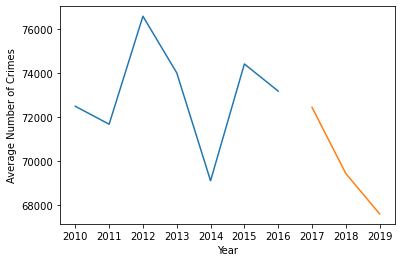

In [23]:
plt.plot(yearly_cali_pre_2016['Year'],yearly_cali_pre_2016['mean'])
plt.plot(yearly_cali_post_2016['Year'],yearly_cali_post_2016['mean'])
plt.ylabel("Average Number of Crimes")
plt.xlabel("Year")

# Results

Discussion

Conclusion

References